In [2]:
import os
import glob
from functools import reduce

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Analysis
---

Note: these plots are for showing, primarily, how much network saving is possible with Baseerat.

### 1. Publisher to subscriber (fanout) ...

- msg_size = 64B = 64 x 8 = 512b

- throughput_1pub/1sub = 1000 msgs/sec = 1000 msg_size/sec 1000 x (512b)/sec = 512 x 10^3 bps = 500kbps

- throughput_1pub/256sub = 256 x throughput_1pub/1sub = 256 x 512 x 10^3 bps = 131.072 x 10^6 bps = 125mbps

**Note: from measurements, we see that throughput_1pub/256sub is sufficient to saturate a single core.** In other words, a single core generates a throughput of:

- 1core = throughput_1pub/256sub = 125mbps

For saturating a 10gbps link, the number of cores required are:

- n10g_cores = (10 x 2^30) / (125 x 2^20) = 81.92

Thus, 81.92 cores are needed to saturate a 10g link. Similarly:

- n40g_cores = 4 x n10g_cores = 327.68
- n100g_cores = 10 x n10g_cores = 819.2

@shahbaz: these are big numbers, I didn't think these would be that large!

For achieving throughput_1pub/1sub, we need 5% of a core (or 0.05 cores).

**Note: we should also note down the CPU type and processing speed as well for this!**

### 2. Subscriber from publisher (fanin) ...

- msg_size = 64B = 64 x 8 = 512b

- throughput_1sub/1pub = 1000 msgs/sec = 1000 msg_size/sec 1000 x (512b)/sec = 512 x 10^3 bps = 500kpbs

- throughput_1sub/64pub = 64 x throughput_1sub/1pub = 64 x 512 x 10^3 bps = 32.768 x 10^6 bps = 31.25mbps

**Note: from measurements, we see that throughput_1sub/64pub is sufficient to saturate a single core.** In other words, a single core generates a throughput of:

- 1core = throughput_1sub/64pub = 31.25mbps

For saturating a 10gbps link, the number of cores required are:

- n10g_cores = (10 x 2^30) / (31.25 x 2^20) = 327.68

Thus, 327.68 cores are needed to saturate a 10g link. Similarly:

- n40g_cores = 4 x n10g_cores = 1310.72
- n100g_cores = 10 x n10g_cores = 3276.8

@shahbaz: these are big numbers, I didn't think these would be that large!

For achieving throughput_1sub/1pub, we need 5% of a core (or 0.05 cores).

**Note: we should also note down the CPU type and processing speed as well for this!**

### 3. Broker

TODO.

## Plots
---

### Publsiher to subscriber ...

In [15]:
pubsub_bw_usage = pd.DataFrame()

pubsub_bw_usage['bandwidth (bps)'] = ['500k', '125m',     '10g',      '40g',    '100g']
pubsub_bw_usage['cores']           = [  0.05,      1,     81.92,     327.68,     819.2]
pubsub_bw_usage['subs']            = [     1,    256, 256*81.92, 256*327.68, 256*819.2]

pubsub_bw_usage = pubsub_bw_usage.set_index('bandwidth (bps)')

pubsub_bw_usage

,cores,subs
bandwidth (bps),,
500k,0.05,1.00
125m,1.00,256.00
10g,81.92,20971.52
40g,327.68,83886.08
100g,819.20,209715.20


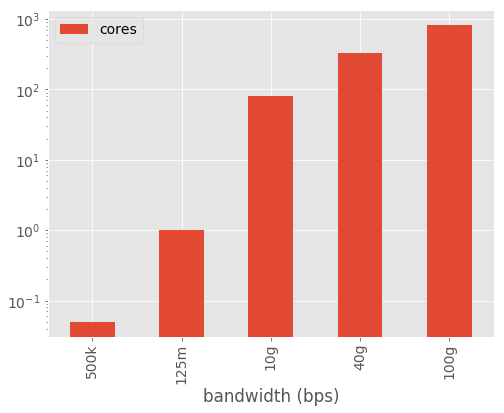

In [28]:
pubsub_bw_usage[['cores']].plot(kind='bar', logy=True)

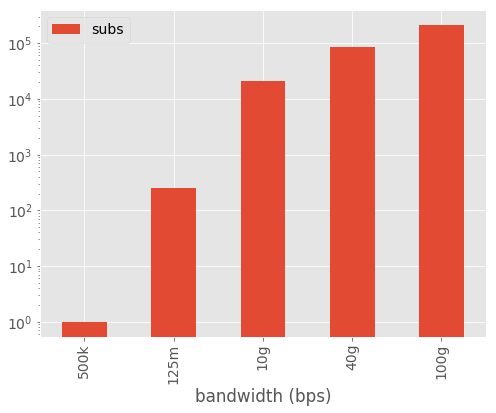

In [17]:
pubsub_bw_usage[['subs']].plot(kind='bar', logy=True)

### Subscriber form publisher ...

In [18]:
subpub_bw_usage = pd.DataFrame()

subpub_bw_usage['bandwidth (bps)'] = ['500k', '31.25m',     '10g',      '40g',    '100g']
subpub_bw_usage['cores']           = [  0.05,        1,    327.68,    1310.72,    3276.8]
subpub_bw_usage['pubs']            = [     1,       64, 64*327.68, 64*1310.72, 64*3276.8]

subpub_bw_usage = subpub_bw_usage.set_index('bandwidth (bps)')

subpub_bw_usage

,cores,pubs
bandwidth (bps),,
500k,0.05,1.00
31.25m,1.00,64.00
10g,327.68,20971.52
40g,1310.72,83886.08
100g,3276.80,209715.20


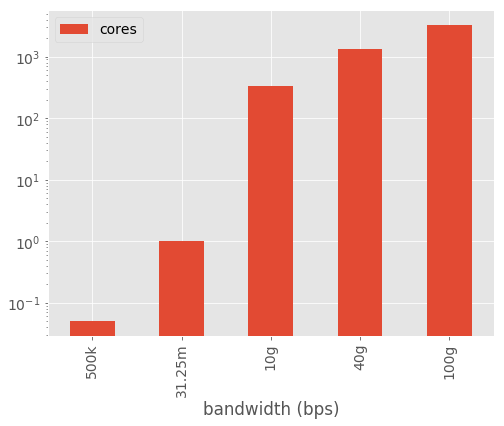

In [19]:
subpub_bw_usage[['cores']].plot(kind='bar', logy=True)

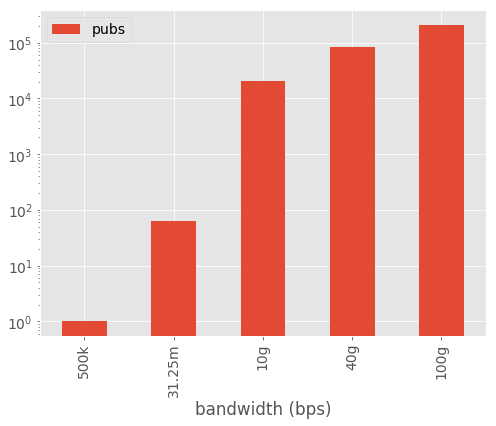

In [24]:
subpub_bw_usage[['pubs']].plot(kind='bar', logy=True)